# グラフの文字で英語以外を使えるようにする

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=05fbb07f7e6205899d39fef9fe75cc747b04f8048e41a459b5bf06b189686c57
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


# 関数 save_fig：図保存用

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def save_fig(plt, file_prefix):
    if file_prefix == '':
        return

    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches='tight', pad_inches = 0)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches = 0)

# 実習1.1：回帰分析の対象とするデータをpandasで読み込む

In [ ]:
import pandas as pd

# CSV形式のデータをデータフレームに読み込む
df=pd.read_csv('dm1.csv',        # ファイルパス
               encoding='utf-8') # エンコーディングにUTF-8を指定

# データフレームの中身を表示
df

,ばねの伸び,おもりの重さ
0,3.0,61.4
1,5.0,51.5
2,7.0,80.5
3,9.0,123.1
4,11.0,133.1
5,13.0,93.6
6,15.0,149.5
7,17.0,144.9
8,19.0,163.2
9,21.0,190.9


# 実習1.2：ばねの伸びの値を表示する

In [ ]:
# データフレームから列「ばねの伸び」を指定して、データを取り出す
df['ばねの伸び']

0      3.0
1      5.0
2      7.0
3      9.0
4     11.0
5     13.0
6     15.0
7     17.0
8     19.0
9     21.0
10    23.0
11    25.0
12    27.0
13    29.0
Name: ばねの伸び, dtype: float64

# 実習1.3：おもりの重さの値を表示する

In [ ]:
# データフレームから列「おもりの重さ」を指定して、データを取り出す
df['おもりの重さ']

0      61.4
1      51.5
2      80.5
3     123.1
4     133.1
5      93.6
6     149.5
7     144.9
8     163.2
9     190.9
10    203.0
11    246.6
12    250.1
13    254.7
Name: おもりの重さ, dtype: float64

# 実習1.4：Matplotlibによるグラフ表示

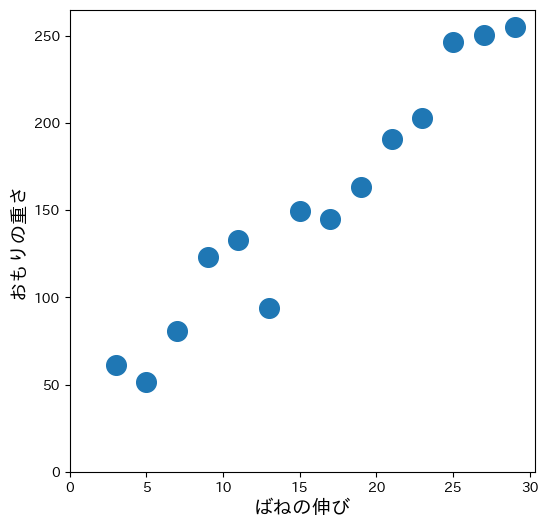

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# グラフのサイズ指定
plt.figure(figsize=(6, 6))

x=df['ばねの伸び'] # ばねの伸び
t=df['おもりの重さ'] # おもりの重さ

# 横軸の値にx, 縦軸の値にtを使い、サイズ200のマーカーで散布図を作成
plt.scatter(x, t, s=200)
plt.xlabel('ばねの伸び', fontsize=14)   # 横軸のラベルとフォントサイズを指定
plt.ylabel('おもりの重さ', fontsize=14) # 縦軸のラベルとフォントサイズを指定
plt.xlim(0, ) # 横軸の表示範囲(最小値, 最大値)。省略するとプログラムにお任せになる
plt.ylim(0, ) # 縦軸の表示範囲(最小値, 最大値)。省略するとプログラムにお任せになる
plt.show()    # グラフの表示

# 実習1.5：単回帰分析を行う

In [ ]:
from sklearn.linear_model import LinearRegression

# データフレームから説明変数（ばねの伸び）の値を取り出す
x=df['ばねの伸び']


# NumPy配列に変換
x=x.to_numpy()

# 分析用に、配列を(データ数, 成分数)の形状に変形
# 今回の形状は(13, 1)
x=x.reshape(-1, 1)

# データフレームから目的変数（おもりの重さ）の値を取り出す。
# xと同様に、NumPy配列への変換と配列の形状変換を行う。
t=df['おもりの重さ']
t=t.to_numpy().reshape(-1, 1)

# 単回帰分析クラスのインスタンス生成
model1=LinearRegression()

# 回帰の実行。パラメータ指定
model1.fit(x, t)

w1=model1.coef_      # model1が持つ傾きの値をw1に代入
w0=model1.intercept_ # model1が持つ切片の値をw0に代入

print('w1(傾き):', w1)
print('w1の形状:', w1.shape)
print('w0(切片):', w0)
print('w0の形状:', w0.shape)

w1(傾き): [[7.96142857]]
w1の形状: (1, 1)
w0(切片): [25.91]
w0の形状: (1,)


# 実習1.6：推定したパラメータを使い、回帰直線を描画する

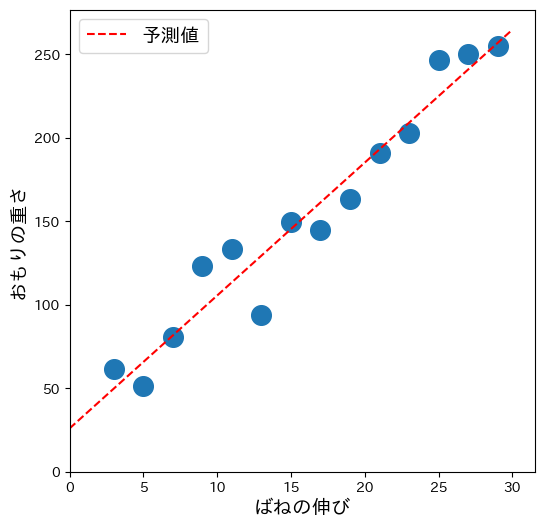

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

# 回帰直線を引くために説明変数の値を生成
# 0以上30以下の範囲で等間隔に100点生成する。
x2=np.linspace(0, 30, 100)

# 配列を(データ数, 成分数)の形状に変形
x2=x2.reshape(-1, 1)

# 目的変数の値を計算
y=model1.predict(x2)
plt.figure(figsize=(6, 6))

# 横軸の値にばねの伸び
# 縦軸の値におもりの重さ
# を使い、サイズ200のマーカーで散布図を作成
plt.scatter(x, t, s=200)

# 回帰直線を描画する
# 横軸の値x2、縦軸の値y、線の種類は破線、線の名前は予測値、線の色は赤
plt.plot(x2, y, linestyle='dashed', label='予測値', color='red')

plt.xlabel('ばねの伸び', fontsize=14)
plt.ylabel('おもりの重さ', fontsize=14)
plt.xlim(0, )
plt.ylim(0, )
plt.legend(fontsize=14)
plt.show()

# 実習1.7：おもりの重さから、ばねの伸びを予測する単回帰分析

In [ ]:
from sklearn.linear_model import LinearRegression

# 単回帰分析クラスのインスタンス生成
model2=LinearRegression()

# 回帰の実行。パラメータ指定
model2.fit(t, x)

w1=model2.coef_      # model2が持つ傾きの値をw1に代入
w0=model2.intercept_ # model2が持つ切片の値をw0に代入
print('w1(傾き):', w1)
print('w1の形状:', w1.shape)
print('w0(切片):', w0)
print('w0の形状:', w0.shape)

w1(傾き): [[0.11796282]]
w1の形状: (1, 1)
w0(切片): [-2.08285767]
w0の形状: (1,)


# 実習1.8：推定したパラメータを使い、回帰直線を描画する

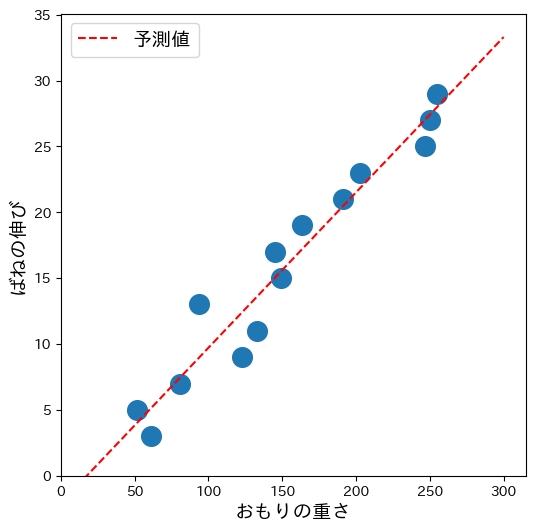

In [ ]:
# 回帰直線を引くために説明変数の値を生成
# 0以上300以下の範囲で等間隔に1000点生成する。
x2=np.linspace(0, 300, 1000)

# 配列を(データ数, 成分数)の形状に変形
x2=x2.reshape(-1, 1)

# 目的変数の値を計算
y=model2.predict(x2)

plt.figure(figsize=(6, 6))

# 横軸の値にばねの伸び
# 縦軸の値におもりの重さ
# を使い、サイズ200のマーカーで散布図を作成
plt.scatter(t, x, s=200)

# 回帰直線を描画する
plt.plot(x2, y, linestyle='dashed', label='予測値', color='red')
plt.xlabel('おもりの重さ', fontsize=14)
plt.ylabel('ばねの伸び', fontsize=14)
plt.xlim(0, )
plt.ylim(0, )
plt.legend(fontsize=14)
plt.show()